In [1]:
import numpy as np
import matplotlib.pyplot as plt

from desdeo_problem.testproblems.DBMOPP.DBMOPP_generator import DBMOPP_generator
from desdeo_problem.testproblems.DBMOPP.Region import AttractorRegion, Attractor, Region
from desdeo_problem.testproblems.DBMOPP.utilities import get_2D_version, euclidean_distance, get_random_angles, between_lines_rooted_at_pivot, assign_design_dimension_projection

In [2]:
import typing

#### Parameters:
   - n_objectives is number of the objectives from 2 to 10
   
   
   - n_variables is number of the variables from 2 to 10
   
   
   - n_local_pareto_regions, number of local pareto regions can be 0 or more. Plotted in green.
    
    
   - n_dominance_res_regions, number of dominance regions can be 0 or more. Plotted in blue.
   
    
   - n_global_pareto_regions, number of global pareto regions can be 1 or more. Plotted in red.
    
    
   - const_space is the proportion of constrained 2D space, 1.0 means whole space is constrained, 0.0 means no amount of space is constrained. If set to anything else than 0.0 constraint type must be 4 or 8.
   
    
   - pareto_set_type. A set type for global pareto set. If set to 1, n_global_pareto_regions must be bigger than 1.
        - 0: duplicate performance
        - 1: partially overlapping performance
        - 2: non-intersecting performance
      
      
  - constraint_type. Is the type of constraints applied.
      - 0: no constraints
      - 1-4: Hard vertex, centre, moat, extended checker type.
      - 5-8: Soft vertex, centre, moat, extended checker type.
   
   - prop_neutral (float): Proportion of neutral space. Defaults to 0
    
The following parameters are suggested to be left to their default values since using different combinations of them in DBMOPP_generator has not been tested yet.
 
 
  - ndo (int): number of regions to apply whose cause discontinuities in objective functions. Default 0. 
  
  
  - vary_sol_density (bool): Should solution density vary in maping down to each of the two visualized dimensions.Default to False
  
  
  - vary_objective_scales (bool): Are objective scale varied. Defaults to False
  
   
  - nm (int): Number of samples used for approximation checker and neutral space coverage. Defaults to 10000

In [3]:
# n_objs = [3,4,5]
# n_vars = [10+k-1]
# disconnected fronts 1, k
#number of local po sets 0 
#n of global po sets 1,k
#non-identical po sets true, false -> pareto_set_type [0,1,2]
#variying density false
#n of dom res regions 0

In [4]:
def make_test_problems(params: dict):
    test_problems = []
    for key, p in params.items():
        print(p)
        # parameters
        n_objectives = p[0]
        n_variables = p[1]
        n_local_pareto_regions = 0 
        n_dominance_res_regions = 0
        n_global_pareto_regions = p[2] 
        const_space = 0.0
        pareto_set_type = p[3] 
        constraint_type = 0 
        
        ndo = 0
        vary_sol_density = False
        vary_objective_scales = False
        prop_neutral = 0.0
        nm = 10000
        
        test_problem = DBMOPP_generator(
            n_objectives,
            n_variables,
            n_local_pareto_regions,
            n_dominance_res_regions,
            n_global_pareto_regions,
            const_space,
            pareto_set_type,
            constraint_type, 
            ndo, 
            vary_sol_density, 
            vary_objective_scales, 
            prop_neutral, 
            nm
        )
        #print(complex_problem._print_params())
        
        print("Initializing works!")
        test_problems.append(test_problem)
    return test_problems

- dominance landscape visualizations to desdeo tools, so need to convert the DBMOPP specific implementation.

In [10]:
# Define the possible values for each parameter
k_values = [3, 4, 5]
p_values = [0, 1, 2]
g_values = [1, 2, 3, 4, 5, 6]
n_values = {}

# Generate n_values based on the constraints
for k in k_values:
    n_values[k] = list(range(10 + k - 1, 10 + k))

# Create all combinations
all_combinations = {}
counter = 1

for k in k_values:
    for n in n_values[k]:
        for g in g_values:
            for p in p_values:
                if (p == 0) or (p == 1 and g > 1) or (p == 2 and g > 0):
                    combination_key = f"combination_{counter}"
                    combination_value = [k, n, g, p]
                    all_combinations[combination_key] = combination_value
                    counter += 1

# Print the result
for key, value in all_combinations.items():
    print(f'{key}: {value}')

combination_1: [3, 12, 1, 0]
combination_2: [3, 12, 1, 2]
combination_3: [3, 12, 2, 0]
combination_4: [3, 12, 2, 1]
combination_5: [3, 12, 2, 2]
combination_6: [3, 12, 3, 0]
combination_7: [3, 12, 3, 1]
combination_8: [3, 12, 3, 2]
combination_9: [3, 12, 4, 0]
combination_10: [3, 12, 4, 1]
combination_11: [3, 12, 4, 2]
combination_12: [3, 12, 5, 0]
combination_13: [3, 12, 5, 1]
combination_14: [3, 12, 5, 2]
combination_15: [3, 12, 6, 0]
combination_16: [3, 12, 6, 1]
combination_17: [3, 12, 6, 2]
combination_18: [4, 13, 1, 0]
combination_19: [4, 13, 1, 2]
combination_20: [4, 13, 2, 0]
combination_21: [4, 13, 2, 1]
combination_22: [4, 13, 2, 2]
combination_23: [4, 13, 3, 0]
combination_24: [4, 13, 3, 1]
combination_25: [4, 13, 3, 2]
combination_26: [4, 13, 4, 0]
combination_27: [4, 13, 4, 1]
combination_28: [4, 13, 4, 2]
combination_29: [4, 13, 5, 0]
combination_30: [4, 13, 5, 1]
combination_31: [4, 13, 5, 2]
combination_32: [4, 13, 6, 0]
combination_33: [4, 13, 6, 1]
combination_34: [4,

[3, 12, 1, 0]
Assigning any checker soft/hard constraint regions and neutral regions
 0.0
Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat soft/hard constraint regions

Initializing works!
[3, 12, 1, 2]
Assigning any checker soft/hard constraint regions and neutral regions
 0.0
Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat soft/hard constraint regions

Initializing works!
[3, 12, 2, 0]
Assigning any checker soft/hard constraint regions and neutral regions
 0.0
Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat soft/hard constraint regions

Initializing works!
[3, 12, 2, 1]
Assigning any checker soft/hard constraint regions and neutral regions
 0.0
Assigning any vertex soft/hard constraint regions

Assigning any centre soft/hard constraint regions.

Assigning any moat so

/home/jp/.cache/pypoetry/virtualenvs/desdeo-problem-Tr-w9DXf-py3.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/jp/.cache/pypoetry/virtualenvs/desdeo-problem-Tr-w9DXf-py3.9/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]


plotting the problems [3, 12, 3, 1]
Generating MOProblem
Evaluation Results Object 
Objective values are: 
[[0.28673827 0.1733831  0.21825062]
 [0.3276496  0.34537499 0.28145458]
 [0.20432697 0.10196997 0.13513723]]
Constraint violation values are: 
None
Fitness values are: 
[[0.28673827 0.1733831  0.21825062]
 [0.3276496  0.34537499 0.28145458]
 [0.20432697 0.10196997 0.13513723]]
Uncertainity values are: 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

plotting the problems [3, 12, 3, 2]
Generating MOProblem
Evaluation Results Object 
Objective values are: 
[[0.28950244 0.30090535 0.34164889]
 [0.06648182 0.07537172 0.39272104]
 [0.10007895 0.09610478 0.35563792]]
Constraint violation values are: 
None
Fitness values are: 
[[0.28950244 0.30090535 0.34164889]
 [0.06648182 0.07537172 0.39272104]
 [0.10007895 0.09610478 0.35563792]]
Uncertainity values are: 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

plotting the problems [3, 12, 4, 0]
Generating MOProblem
Evaluation Results Object 


/home/jp/tyot/mop/desdeo/desdeo-problem/desdeo_problem/testproblems/DBMOPP/DBMOPP_generator.py:947: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


plotting the problems [4, 13, 5, 1]
Generating MOProblem
Evaluation Results Object 
Objective values are: 
[[0.3906297  0.21432184 0.53704838 0.43218112]
 [0.26251686 0.04891754 0.33750084 0.24370244]
 [0.43717839 0.4037466  0.66730359 0.4797573 ]
 [0.29416383 0.21768666 0.49016028 0.42395974]]
Constraint violation values are: 
None
Fitness values are: 
[[0.3906297  0.21432184 0.53704838 0.43218112]
 [0.26251686 0.04891754 0.33750084 0.24370244]
 [0.43717839 0.4037466  0.66730359 0.4797573 ]
 [0.29416383 0.21768666 0.49016028 0.42395974]]
Uncertainity values are: 
[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]

plotting the problems [4, 13, 5, 2]
Generating MOProblem
Evaluation Results Object 
Objective values are: 
[[0.3420367  0.22829814 0.24177144 0.53507021]
 [0.36849612 0.25669811 0.26968973 0.56333818]
 [0.40558962 0.31479132 0.32254546 0.64951723]
 [0.2477594  0.15271997 0.15990461 0.49892324]]
Constraint violation values are: 
None
Fitness values a

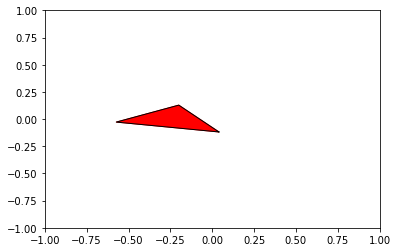

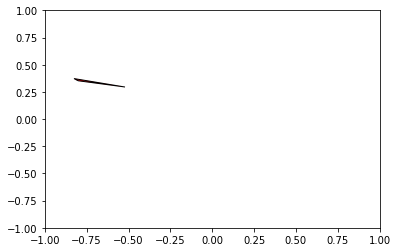

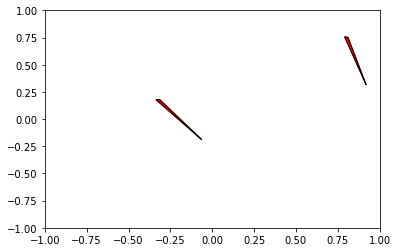

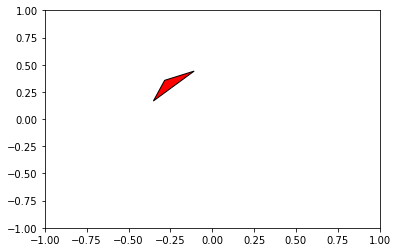

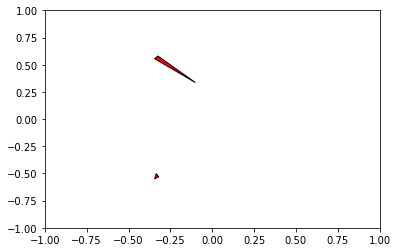

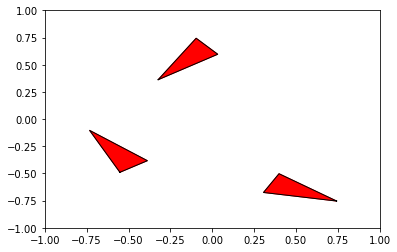

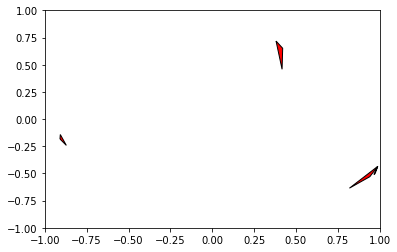

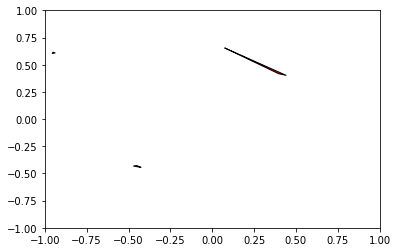

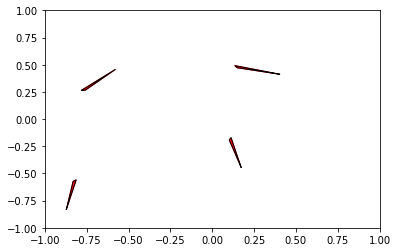

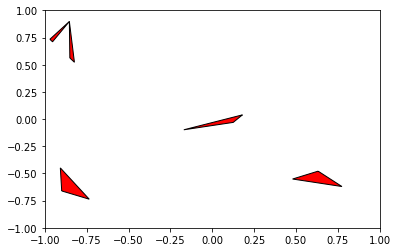

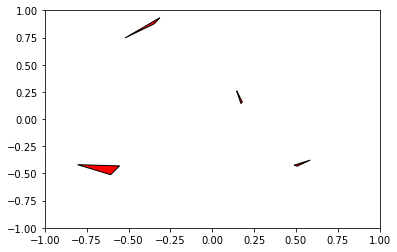

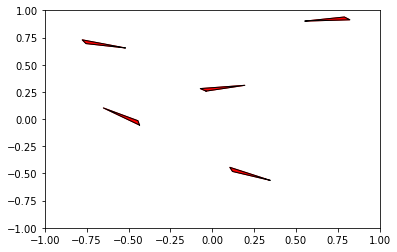

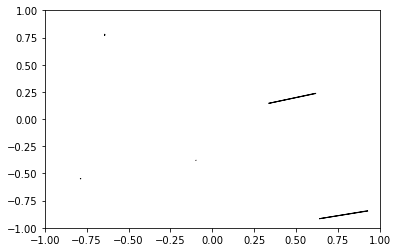

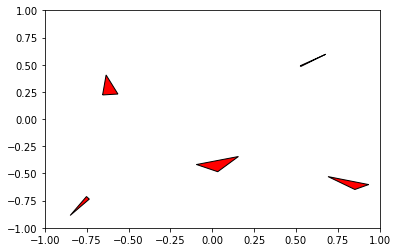

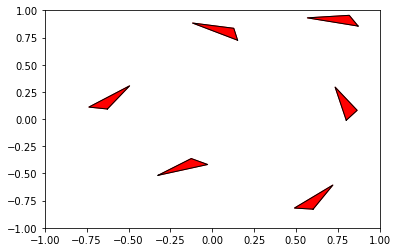

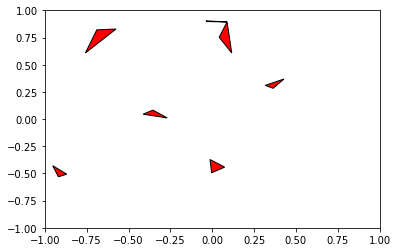

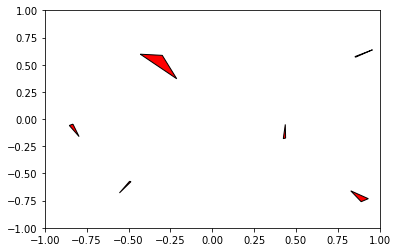

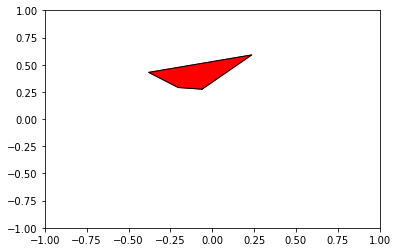

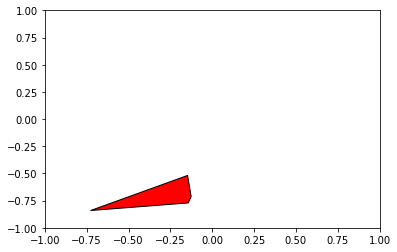

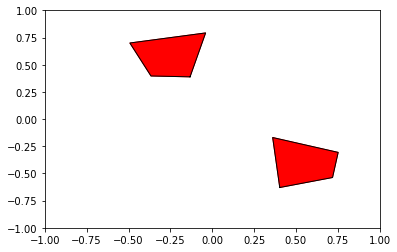

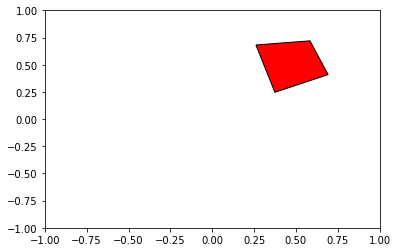

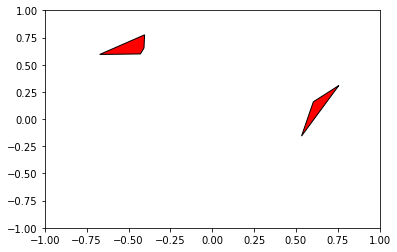

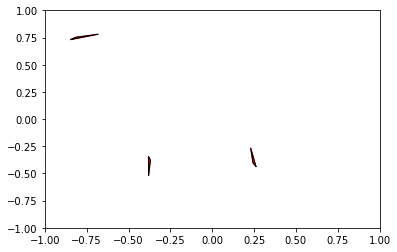

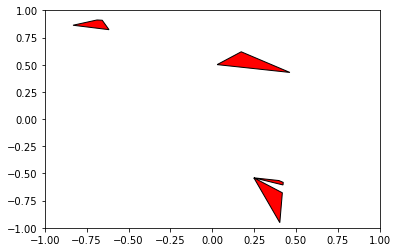

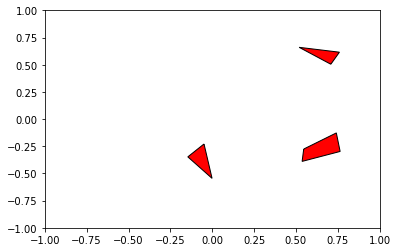

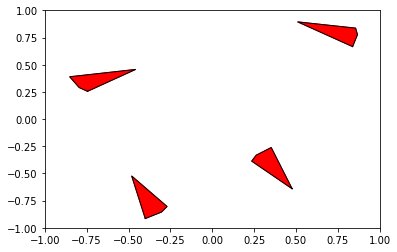

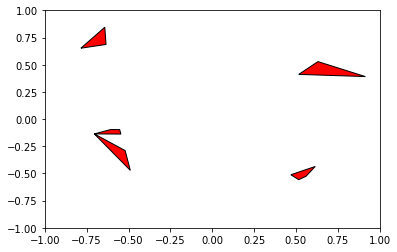

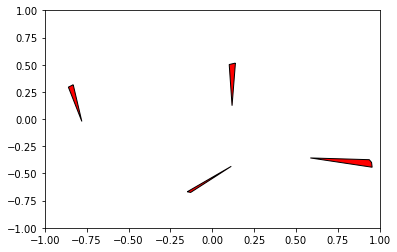

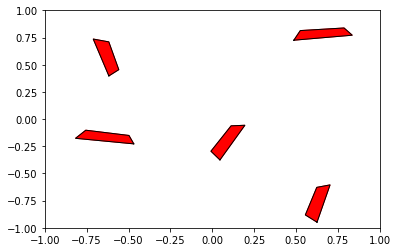

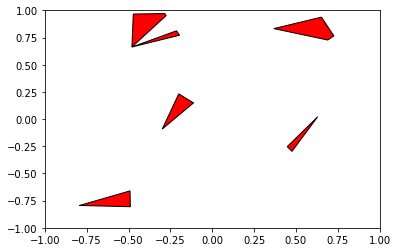

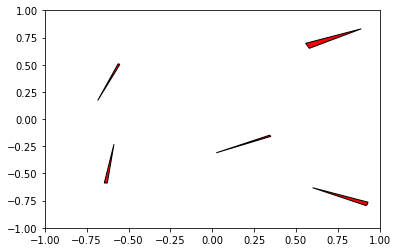

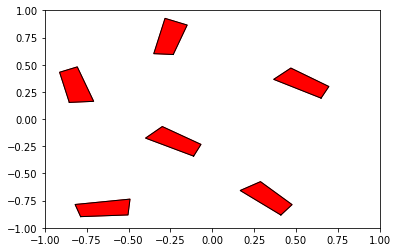

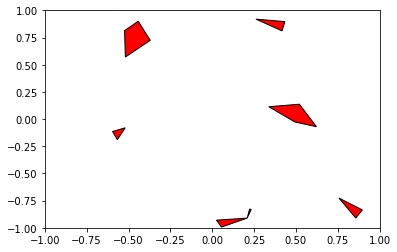

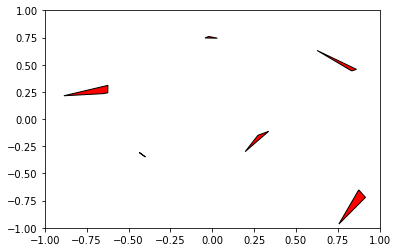

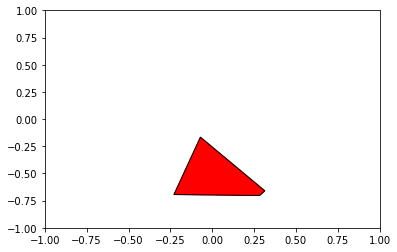

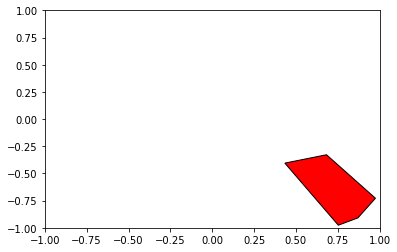

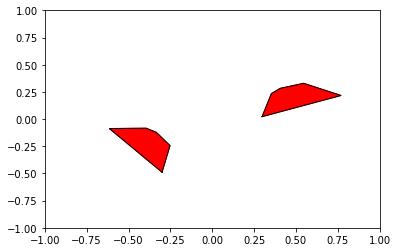

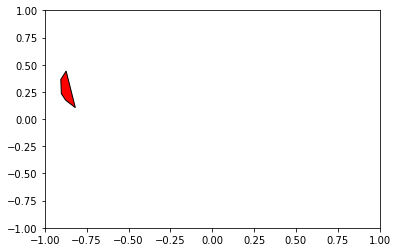

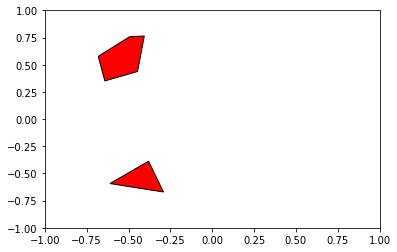

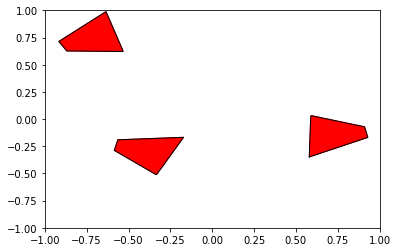

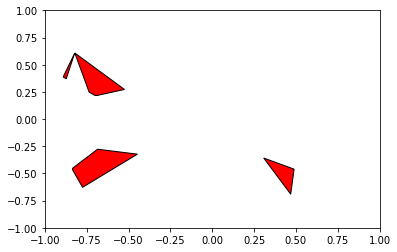

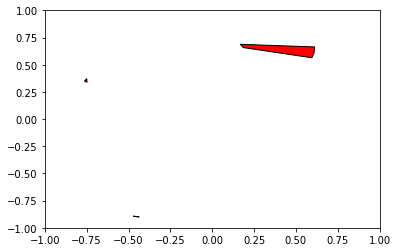

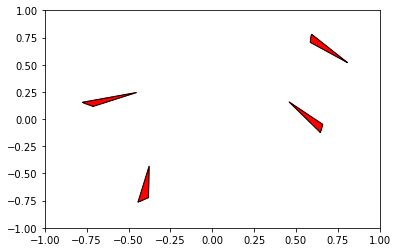

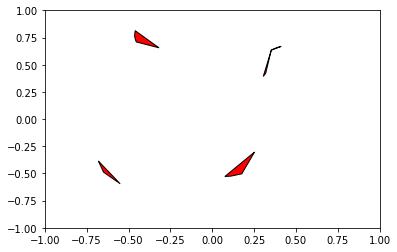

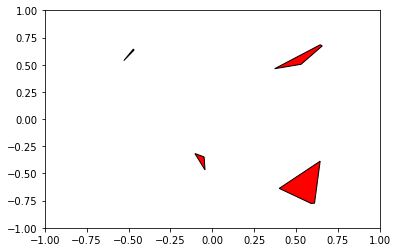

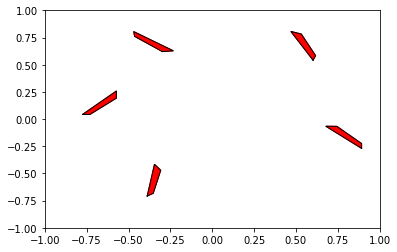

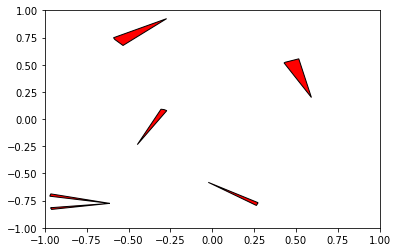

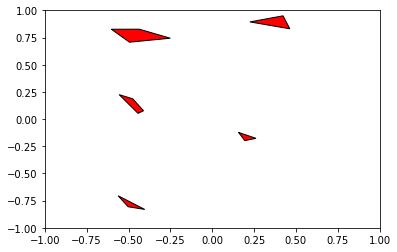

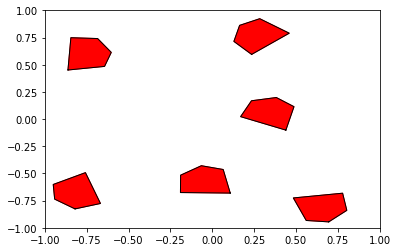

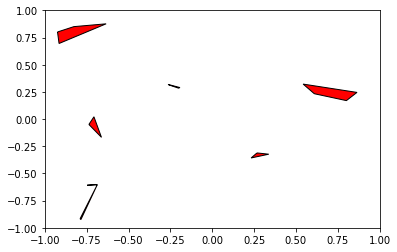

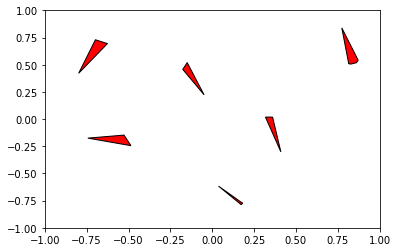

In [9]:
params = all_combinations
tp = make_test_problems(params)
for t in range(0,len(all_combinations)):
    print("plotting the problems", all_combinations[f"combination_{t+1}"])
    import random

    n_of_variables = all_combinations[f"combination_{t+1}"][1]
    x = np.array(np.random.rand(all_combinations[f"combination_{t+1}"][0], n_of_variables))
    moproblem = tp[t].generate_problem()
    evaluation_result = moproblem.evaluate(x)
    print(evaluation_result)
    try:
        tp[t].plot_problem_instance()
    except:
        continue

In [ ]:
resolution = 300
# function returns the plotted dots as a list. If list has too little members, make resolution bigger.
pareto_optimal_set = test_problem.plot_pareto_set_members(resolution)
print(pareto_optimal_set[:5]) # print first five

In [ ]:
import random

n_of_variables = simple_problem.n
x = np.array(np.random.rand(5, n_of_variables))
evaluation_result = moproblem.evaluate(x)
print(evaluation_result)